<a href="https://colab.research.google.com/github/noahspenser/quantumcomputing/blob/master/Homework2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Plot for Hadamard Rotation Matrix Test


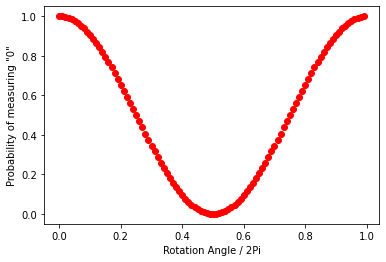



Plot for SWAP Rotation Test


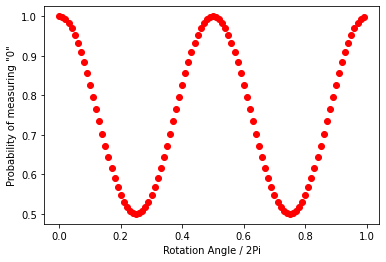

In [143]:
import numpy, numpy.random, scipy, scipy.linalg
import matplotlib.pyplot as plt

# Define 2D Identity
Id = numpy.eye(2)

# Define Zero and One kets
Zero = numpy.array([[1.0],
                    [0.0]])
One = numpy.array([[0.0],
                   [1.0]])

# Define P0 and P1
P0 = numpy.dot(Zero, Zero.T)
P1 = numpy.dot(One, One.T)

# Normalization lambda function
Normalize = lambda state: state / scipy.linalg.norm(state)

# Define Plus and Minus kets
Plus = Normalize(Zero + One)
Minus = Normalize(Zero - One)

# Define Hadamard gate operator
Hadamard = 1./numpy.sqrt(2) * numpy.array([[1, 1],
                                           [1, -1]])

# Define Swap gate operator
SWAP = numpy.array([[1, 0, 0, 0],
                    [0, 0, 1, 0],
                    [0, 1, 0, 0],
                    [0, 0, 0, 1]])

# Define N Qubit input generator from Zero and One kets using Kronecker product
def NQubit(*args):
  result = numpy.array([[1.0]])
  for arg in args:
    result = numpy.kron(result, arg)
  return result

# Given a probabilistic state, calculate probability of returning zero
def Prob0(InState):
  # Calculate degree of input
  l, w = InState.shape
  n = int(numpy.round(numpy.log2(l)))
  CatState = InState
  RhoCatState = numpy.dot(CatState, CatState.T)
  p0here = P0
  # Generate output matrix of correct size
  for m in range(n-1):
    p0here = numpy.kron(p0here, Id)
  return numpy.trace(numpy.dot(p0here, RhoCatState))

# Create rotation matrix for given angle
def RotMat(theta):
  ang = 2 * numpy.pi * theta # Create angle from [0, 1)
  # Define sine and cosine
  c, s = numpy.cos(ang), numpy.sin(ang)
  # Build and return rotation matrix
  return numpy.array([[c, -s],
                      [s, c]])

def HadamardTest(psi, U):
  # Create initial qubit states and combined state
  qb1 = Zero
  qb2 = psi
  state = NQubit(qb1, qb2)

  # Define controlled unitary operator for entangled state 
  # (Id top left, Unitary bottom right)
  unitOp = numpy.append(numpy.kron(Zero, Id),numpy.kron(One, U), 1)

  # Apply first Hadamard gate
  state = numpy.dot(numpy.kron(Hadamard, Id), state)

  # Apply controlled unitary operator
  state = numpy.dot(unitOp, state)

  # Apply second Hadamard gate
  state = numpy.dot(numpy.kron(Hadamard, Id), state)

  # Return final probabilistic state
  return state

def SwapTest(psi1, psi2):
  # Create initial qubit states and combined state
  qb1 = Zero
  qb2 = psi1
  qb3 = psi2
  state = NQubit(qb1, qb2, qb3)

  # Define Fredkin gate matrix
  Fredkin = numpy.append(numpy.kron(Zero, NQubit(Id, Id)), numpy.kron(One, SWAP), 1)

  # Apply first Hadamard gate
  state = numpy.dot(NQubit(Hadamard, Id, Id), state)
  
  # Apply Fredkin gate
  state = numpy.dot(Fredkin, state)
  
  # Apply second Hadamard gate
  state = numpy.dot(NQubit(Hadamard, Id, Id), state)

  # Return final probabilistic state
  return state


# Create lambda function for matplot
HWTest1 = lambda Th: Prob0(HadamardTest(Zero, RotMat(Th)))

# Create plot for part 1, Probability of measuring 0 in a Hadamard test with
# ket psi = |0> and U = the rotation matrix for theta * 2 * pi
print("Plot for Hadamard Rotation Matrix Test")
t = numpy.arange(0., 1., .01)
t0 = numpy.array(list(map(HWTest1, t)))
plt.plot(t, t0, 'ro')
plt.xlabel('Rotation Angle / 2Pi')
plt.ylabel('Probability of measuring "0"')
plt.show()

# Create lambda function for matplot
HWTest2 = lambda Th: Prob0(SwapTest(Zero, numpy.cos(2*numpy.pi*Th) * Zero + numpy.sin(2*numpy.pi*Th) * One))
# Create plot for part 2, Probability of measuring 0 in a SWAP test with
# ket psi1 = |0> and ket psi2 = cos(2 pi theta)|0> + sin(2 pi theta)|1> for theta = [0, 1]
print("\n\nPlot for SWAP Rotation Test")
t = numpy.arange(0., 1., .01)
t0 = numpy.array(list(map(HWTest2, t)))
plt.plot(t, t0, 'ro')
plt.xlabel('Rotation Angle / 2Pi')
plt.ylabel('Probability of measuring "0"')
plt.show()